In [3]:
import mnist
from tensorflow import keras
import keras_tuner as kt

In [4]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(784,)))

    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-0, 1e-1, 1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [5]:
tuner = kt.Hyperband(build_model,
                     objective='accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir4',
                     project_name='intro_to_kt')

In [6]:
# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [7]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [8]:
# %%time
tuner.search(train_images, train_labels)

models = tuner.get_best_models(num_models=2)

tuner.results_summary()

Trial 30 Complete [00h 00m 23s]
accuracy: 0.9840666651725769

Best accuracy So Far: 0.9840666651725769
Total elapsed time: 00h 05m 55s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir4\intro_to_kt
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9840666651725769
Trial summary
Hyperparameters:
units: 480
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: d2d6a96b2fa4cb60710ae5aba92ca508
Score: 0.979616641998291
Trial summary
Hyperparameters:
units: 352
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 1dd80f1ee4c60190826702b9fd656db9
Score: 0.9794333577156067
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 

In [10]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 160 and the optimal learning rate for the optimizer
is 0.001.



In [11]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3533 - accuracy: 0.8941 - val_loss: 0.1913 - val_accuracy: 0.9461
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1788 - accuracy: 0.9459 - val_loss: 0.1643 - val_accuracy: 0.9528
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1291 - accuracy: 0.9610 - val_loss: 0.1179 - val_accuracy: 0.9639
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1057 - accuracy: 0.9675 - val_loss: 0.1057 - val_accuracy: 0.9693
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0904 - accuracy: 0.9724 - val_loss: 0.1257 - val_accuracy: 0.9629 loss: 0.0910 - 
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0790 - accuracy: 0.9746 - val_loss: 0.0954 - val_accuracy: 0.9716
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0699 - accuracy: 0.9782 - val_loss: 0.1079

In [12]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 44


In [13]:
hypermodel = tuner.hypermodel.build(best_hps)

In [14]:
# Retrain the model
hypermodel.fit(train_images, train_labels, epochs=best_epoch, validation_split=0.2)

Epoch 1/44
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3663 - accuracy: 0.8909 - val_loss: 0.2193 - val_accuracy: 0.9364
Epoch 2/44
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1878 - accuracy: 0.9444 - val_loss: 0.1563 - val_accuracy: 0.9570
Epoch 3/44
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1372 - accuracy: 0.9588 - val_loss: 0.1622 - val_accuracy: 0.9519
Epoch 4/44
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1106 - accuracy: 0.9668 - val_loss: 0.1177 - val_accuracy: 0.9649
Epoch 5/44
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0963 - accuracy: 0.9707 - val_loss: 0.1058 - val_accuracy: 0.9675
Epoch 6/44
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0826 - accuracy: 0.9741 - val_loss: 0.1191 - val_accuracy: 0.9651
Epoch 7/44
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0722 - accuracy: 0.9780 - val_loss: 0.1004 - val_accuracy:

In [15]:
eval_result = hypermodel.evaluate(test_images, test_labels)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.9765
[test loss, test accuracy]: [0.14059212803840637, 0.9764999747276306]


In [17]:
import numpy as np

In [28]:
# Запуск нейронной сети для выполнения работы

# Predict on the first 4 test images.
predictions = hypermodel.predict(test_images[193:197])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9, 0, 2, 1]
print(test_labels[193:197]) # [9, 0, 2, 1]

[9 0 2 1]
[9 0 3 1]


In [30]:
import matplotlib.pyplot as plt

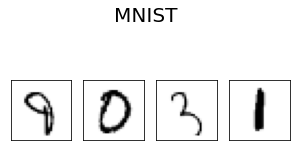

In [39]:
# Визуализируем данные на которых модель ошибласть, в данном случае это цифра - "тройка", 
#  которую модель ошибочно приняла за двойку
test_images_v0 = mnist.test_images()
fig, axes = plt.subplots(1, 4, figsize=(5, 3))
fig.suptitle('MNIST', fontsize=20)
n = 193
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(test_images_v0[n], cmap='Greys')
    n += 1